In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Ecopack.csv")

df.shape, df.columns.tolist(), df.dtypes

((5000, 8),
 ['Material_Type',
  'Tensile_Strength_MPa',
  'Weight_Capacity_kg',
  'Biodegradability_Score',
  'CO2_Emission_Score',
  'Recyclability_Percent',
  'Moisture_Barrier_Grade',
  'AI_Recommendation'],
 Material_Type              object
 Tensile_Strength_MPa      float64
 Weight_Capacity_kg        float64
 Biodegradability_Score    float64
 CO2_Emission_Score        float64
 Recyclability_Percent     float64
 Moisture_Barrier_Grade      int64
 AI_Recommendation          object
 dtype: object)

In [2]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Material_Type           5000 non-null   object 
 1   Tensile_Strength_MPa    5000 non-null   float64
 2   Weight_Capacity_kg      5000 non-null   float64
 3   Biodegradability_Score  5000 non-null   float64
 4   CO2_Emission_Score      5000 non-null   float64
 5   Recyclability_Percent   5000 non-null   float64
 6   Moisture_Barrier_Grade  5000 non-null   int64  
 7   AI_Recommendation       5000 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [3]:
df.duplicated().sum()

missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().mean()*100).round(2).sort_values(ascending=False)

pd.concat([missing, missing_percent], axis=1, 
          keys=["missing_count", "missing_pct"])

,missing_count,missing_pct
Material_Type,0,0.0
Tensile_Strength_MPa,0,0.0
Weight_Capacity_kg,0,0.0
Biodegradability_Score,0,0.0
CO2_Emission_Score,0,0.0
Recyclability_Percent,0,0.0
Moisture_Barrier_Grade,0,0.0
AI_Recommendation,0,0.0


In [4]:
num = df.select_dtypes(include=["number"])
cat = df.select_dtypes(include=["object", "category"])

num, cat

(      Tensile_Strength_MPa  Weight_Capacity_kg  Biodegradability_Score  \
 0                     11.5                 8.5                   100.0   
 1                     16.5                 7.7                    94.8   
 2                     22.4                 0.7                    96.5   
 3                     83.3                 6.1                     4.3   
 4                     23.0                 7.4                   100.0   
 ...                    ...                 ...                     ...   
 4995                  22.7                 7.8                   100.0   
 4996                  58.1                 8.8                    96.8   
 4997                  21.4                 6.4                   100.0   
 4998                  31.2                 5.3                     0.0   
 4999                  65.5                 6.3                     1.1   
 
       CO2_Emission_Score  Recyclability_Percent  Moisture_Barrier_Grade  
 0                   0.

In [5]:
num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tensile_Strength_MPa,5000.0,37.608500,21.797017,5.0,20.200,32.50,55.300,90.00
Weight_Capacity_kg,5000.0,5.253060,2.723564,0.5,3.000,5.20,7.625,10.00
Biodegradability_Score,5000.0,72.421600,41.537020,0.0,4.900,96.00,100.000,100.00
CO2_Emission_Score,5000.0,2.579102,3.160204,0.1,0.550,1.16,3.520,11.97
Recyclability_Percent,5000.0,57.216040,33.610891,0.0,29.675,54.80,93.200,100.00
Moisture_Barrier_Grade,5000.0,6.686200,2.570029,2.0,5.000,6.00,10.000,10.00


In [6]:
for c in cat.columns:
    print(c, " - unique:", df[c].nunique(), 
          " top values:\n", df[c].value_counts().head(5), "\n")


Material_Type  - unique: 8  top values:
 Material_Type
Bamboo Fiber           644
Bagasse (Sugarcane)    641
Edible Seaweed Film    639
Aluminum Foil          638
Mushroom Mycelium      623
Name: count, dtype: int64 

AI_Recommendation  - unique: 3  top values:
 AI_Recommendation
Highly Recommended    2959
Avoid                 1259
Consider as Option     782
Name: count, dtype: int64 



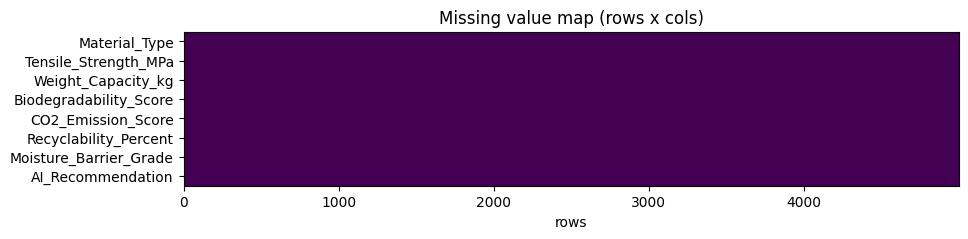

In [7]:
plt.figure(figsize=(10,2))
plt.imshow(df.isna().T, aspect="auto")
plt.xlabel("rows")
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Missing value map (rows x cols)")
plt.show()

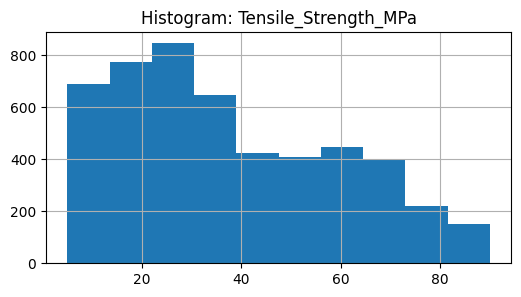

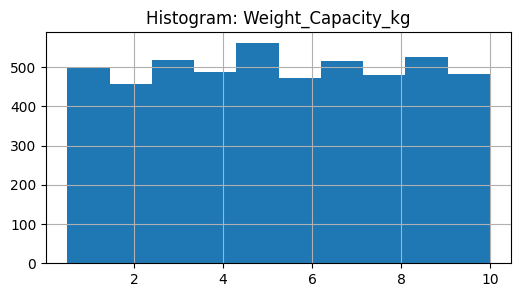

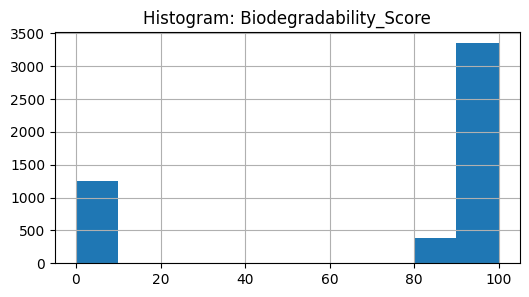

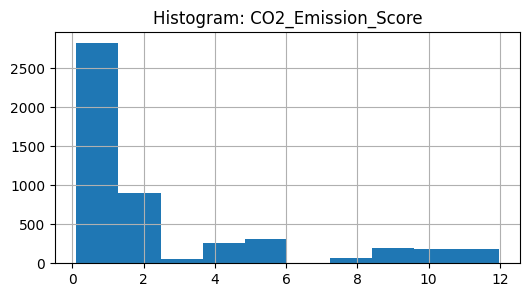

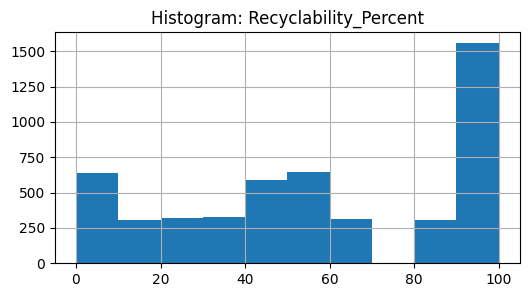

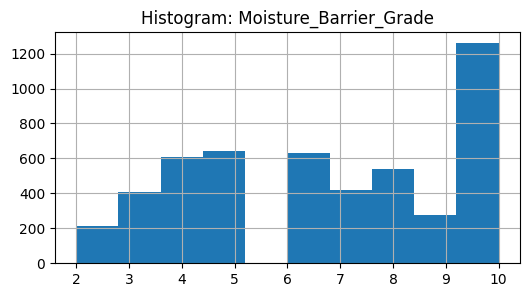

In [8]:
for col in num.columns:
    plt.figure(figsize=(6,3))
    df[col].dropna().hist()
    plt.title(f"Histogram: {col}")
    plt.show()

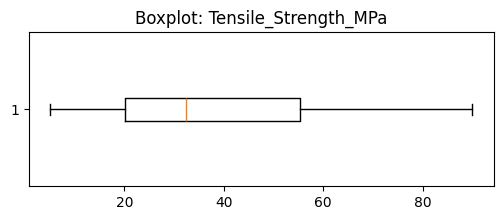

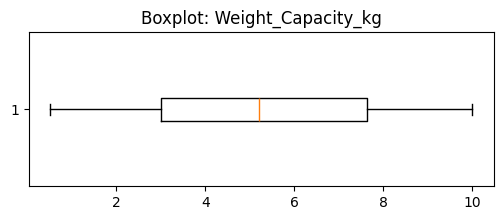

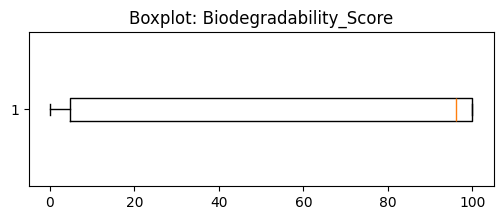

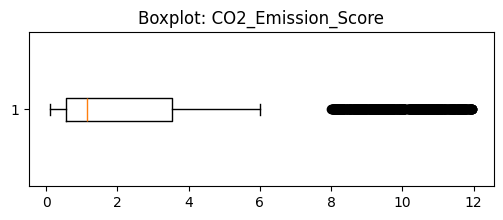

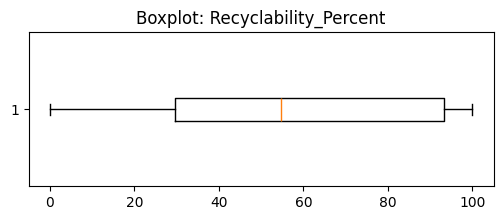

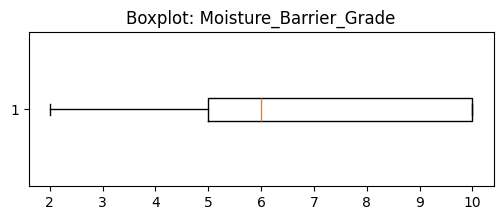

In [9]:
for col in num.columns:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot: {col}")
    plt.show()

In [10]:
corr = num.corr()
corr.round(3)

,Tensile_Strength_MPa,Weight_Capacity_kg,Biodegradability_Score,CO2_Emission_Score,Recyclability_Percent,Moisture_Barrier_Grade
Tensile_Strength_MPa,1.000,-0.011,-0.453,0.259,-0.296,0.724
Weight_Capacity_kg,-0.011,1.000,0.019,-0.016,0.004,-0.016
Biodegradability_Score,-0.453,0.019,1.000,-0.899,-0.023,-0.781
CO2_Emission_Score,0.259,-0.016,-0.899,1.000,0.240,0.729
Recyclability_Percent,-0.296,0.004,-0.023,0.240,1.000,0.040
Moisture_Barrier_Grade,0.724,-0.016,-0.781,0.729,0.040,1.000


In [11]:
c = corr.abs()
c.values[np.eye(c.shape[0], dtype=bool)] = 0  # remove self-correlations

pairs = c.stack().reset_index().sort_values(0, ascending=False).head(10)
pairs.columns = ["var1", "var2", "abs_corr"]
pairs

,var1,var2,abs_corr
20,CO2_Emission_Score,Biodegradability_Score,0.899060
15,Biodegradability_Score,CO2_Emission_Score,0.899060
17,Biodegradability_Score,Moisture_Barrier_Grade,0.781233
32,Moisture_Barrier_Grade,Biodegradability_Score,0.781233
23,CO2_Emission_Score,Moisture_Barrier_Grade,0.729484
33,Moisture_Barrier_Grade,CO2_Emission_Score,0.729484
5,Tensile_Strength_MPa,Moisture_Barrier_Grade,0.724178
30,Moisture_Barrier_Grade,Tensile_Strength_MPa,0.724178
12,Biodegradability_Score,Tensile_Strength_MPa,0.453341
2,Tensile_Strength_MPa,Biodegradability_Score,0.453341


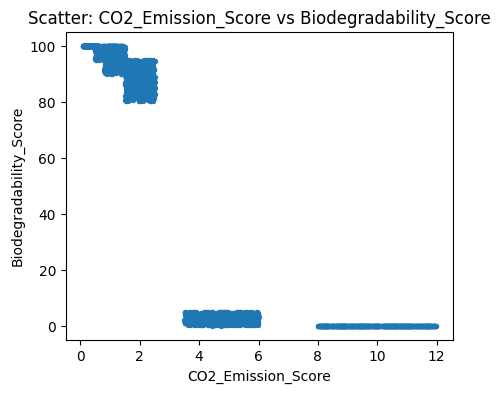

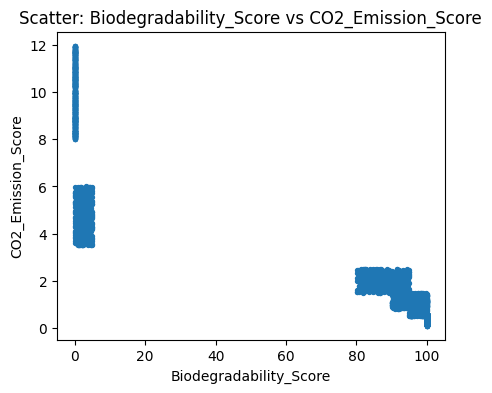

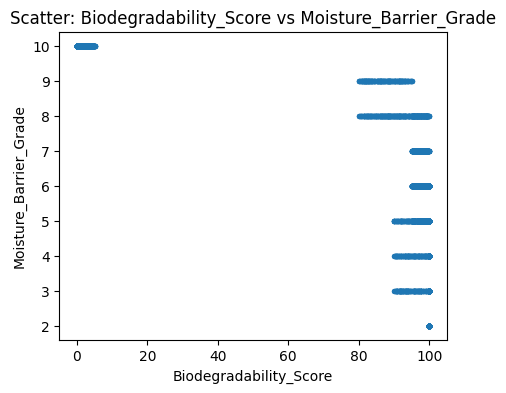

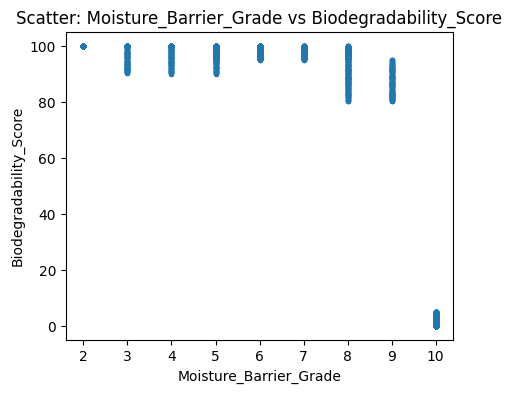

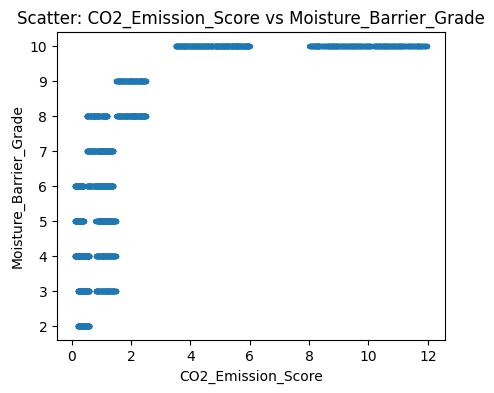

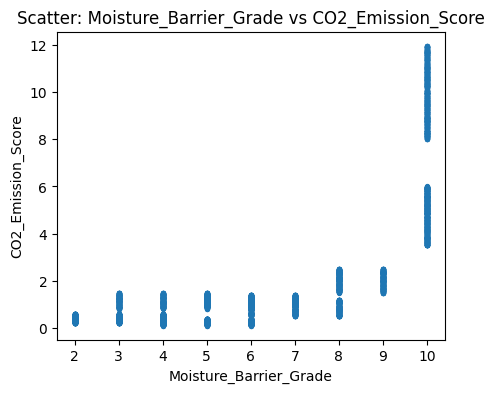

In [12]:
for v1, v2 in pairs[["var1", "var2"]].values[:6]:
    plt.figure(figsize=(5,4))
    plt.scatter(df[v1], df[v2], s=8)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.title(f"Scatter: {v1} vs {v2}")
    plt.show()


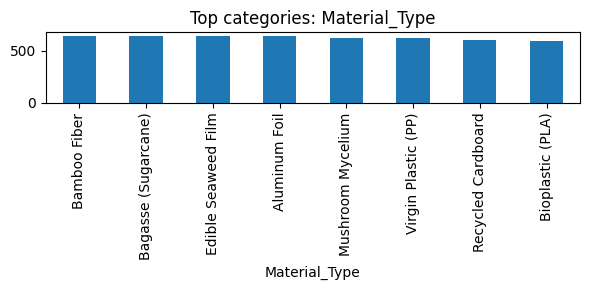

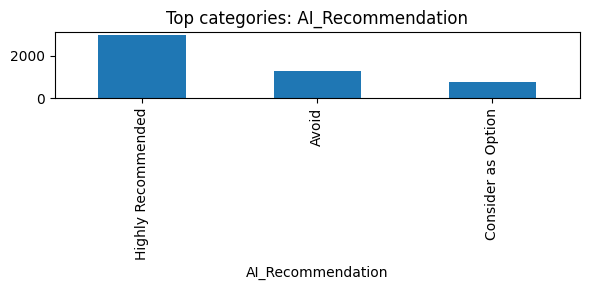

In [13]:
for c in cat.columns:
    vc = df[c].value_counts().head(15)
    plt.figure(figsize=(6,3))
    vc.plot(kind="bar")
    plt.title(f"Top categories: {c}")
    plt.tight_layout()
    plt.show()

In [14]:
corr = df.select_dtypes(include=["number"]).corr()
corr

,Tensile_Strength_MPa,Weight_Capacity_kg,Biodegradability_Score,CO2_Emission_Score,Recyclability_Percent,Moisture_Barrier_Grade
Tensile_Strength_MPa,1.000000,-0.010561,-0.453341,0.259073,-0.295719,0.724178
Weight_Capacity_kg,-0.010561,1.000000,0.018837,-0.016435,0.004114,-0.016265
Biodegradability_Score,-0.453341,0.018837,1.000000,-0.899060,-0.023026,-0.781233
CO2_Emission_Score,0.259073,-0.016435,-0.899060,1.000000,0.240465,0.729484
Recyclability_Percent,-0.295719,0.004114,-0.023026,0.240465,1.000000,0.040137
Moisture_Barrier_Grade,0.724178,-0.016265,-0.781233,0.729484,0.040137,1.000000


In [15]:
corr.round(3)

,Tensile_Strength_MPa,Weight_Capacity_kg,Biodegradability_Score,CO2_Emission_Score,Recyclability_Percent,Moisture_Barrier_Grade
Tensile_Strength_MPa,1.000,-0.011,-0.453,0.259,-0.296,0.724
Weight_Capacity_kg,-0.011,1.000,0.019,-0.016,0.004,-0.016
Biodegradability_Score,-0.453,0.019,1.000,-0.899,-0.023,-0.781
CO2_Emission_Score,0.259,-0.016,-0.899,1.000,0.240,0.729
Recyclability_Percent,-0.296,0.004,-0.023,0.240,1.000,0.040
Moisture_Barrier_Grade,0.724,-0.016,-0.781,0.729,0.040,1.000


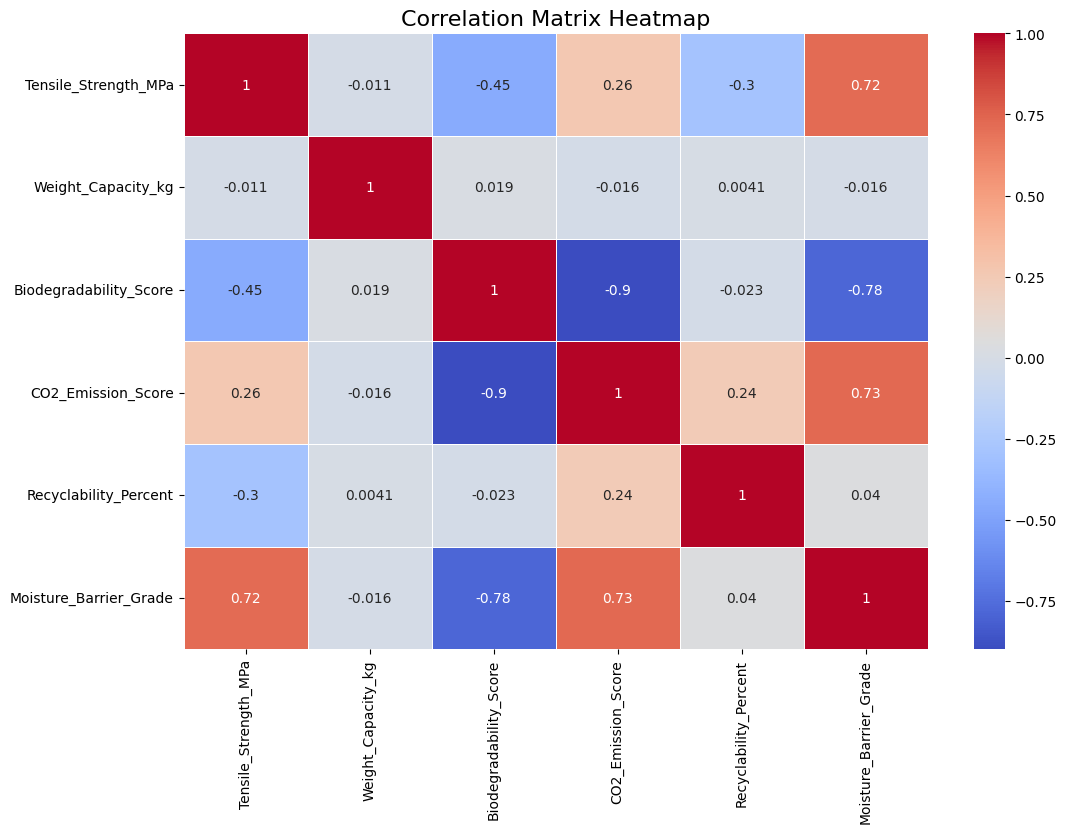

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [17]:
c = corr.abs()
c.values[np.eye(c.shape[0], dtype=bool)] = 0

pairs = (
    c.stack()
    .reset_index()
    .sort_values(0, ascending=False)
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)

pairs.head(10)

,Feature 1,Feature 2,Correlation
20,CO2_Emission_Score,Biodegradability_Score,0.899060
15,Biodegradability_Score,CO2_Emission_Score,0.899060
17,Biodegradability_Score,Moisture_Barrier_Grade,0.781233
32,Moisture_Barrier_Grade,Biodegradability_Score,0.781233
23,CO2_Emission_Score,Moisture_Barrier_Grade,0.729484
33,Moisture_Barrier_Grade,CO2_Emission_Score,0.729484
5,Tensile_Strength_MPa,Moisture_Barrier_Grade,0.724178
30,Moisture_Barrier_Grade,Tensile_Strength_MPa,0.724178
12,Biodegradability_Score,Tensile_Strength_MPa,0.453341
2,Tensile_Strength_MPa,Biodegradability_Score,0.453341


In [18]:
df.columns

Index(['Material_Type', 'Tensile_Strength_MPa', 'Weight_Capacity_kg',
       'Biodegradability_Score', 'CO2_Emission_Score', 'Recyclability_Percent',
       'Moisture_Barrier_Grade', 'AI_Recommendation'],
      dtype='object')

In [19]:
df.columns.tolist()


['Material_Type',
 'Tensile_Strength_MPa',
 'Weight_Capacity_kg',
 'Biodegradability_Score',
 'CO2_Emission_Score',
 'Recyclability_Percent',
 'Moisture_Barrier_Grade',
 'AI_Recommendation']

In [20]:
# ===============================
# STEP 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# STEP 2: Load CSV File
# ===============================
df = pd.read_csv("Ecopack.csv")

print("Dataset loaded successfully!")
print(df.head())

# ===============================
# STEP 3: Define Features & Target
# ===============================
features = [
    "Material_Type",
    "Tensile_Strength_MPa",
    "Weight_Capacity_kg",
    "Biodegradability_Score",
    "Recyclability_Percent",
    "Moisture_Barrier_Grade",
    "AI_Recommendation"
]

target = "CO2_Emission_Score"

X = df[features]   # inputs
y = df[target]     # output

# ===============================
# STEP 4: Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# STEP 5: Separate Numeric & Categorical Columns
# ===============================
num_features = [
    "Tensile_Strength_MPa",
    "Weight_Capacity_kg",
    "Biodegradability_Score",
    "Recyclability_Percent",
    "Moisture_Barrier_Grade"
]

cat_features = [
    "Material_Type",
    "AI_Recommendation"
]

# ===============================
# STEP 6: Create Data Pipelines
# ===============================
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features)
    ]
)

# ===============================
# STEP 7: Build & Train Model
# ===============================
model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)

print("Model training completed!")

# ===============================
# STEP 8: Make Predictions
# ===============================
y_pred = model.predict(X_test)

# ===============================
# STEP 9: Evaluate Model
# ===============================
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


Dataset loaded successfully!
         Material_Type  Tensile_Strength_MPa  Weight_Capacity_kg  \
0    Mushroom Mycelium                  11.5                 8.5   
1   Recycled Cardboard                  16.5                 7.7   
2  Bagasse (Sugarcane)                  22.4                 0.7   
3  Virgin Plastic (PP)                  83.3                 6.1   
4    Mushroom Mycelium                  23.0                 7.4   

   Biodegradability_Score  CO2_Emission_Score  Recyclability_Percent  \
0                   100.0                0.29                  100.0   
1                    94.8                0.88                   95.4   
2                    96.5                1.20                   63.2   
3                     4.3                3.82                   17.0   
4                   100.0                0.27                  100.0   

   Moisture_Barrier_Grade   AI_Recommendation  
0                       5  Highly Recommended  
1                       4  Highly

In [21]:
# =====================================================
# IMPORT LIBRARIES
# =====================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

# =====================================================
# LOAD DATASET
# =====================================================
df = pd.read_csv("Ecopack.csv")

print("Dataset shape:", df.shape)

# =====================================================
# FEATURES & TARGETS (BASED ON YOUR CSV)
# =====================================================
features = [
    "Material_Type",
    "Tensile_Strength_MPa",
    "Weight_Capacity_kg",
    "Biodegradability_Score",
    "Recyclability_Percent",
    "Moisture_Barrier_Grade",
    "AI_Recommendation"
]

target_co2 = "CO2_Emission_Score"

X = df[features]
y = df[target_co2]

# =====================================================
# TRAIN TEST SPLIT
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================================================
# NUMERIC & CATEGORICAL COLUMNS
# =====================================================
num_features = [
    "Tensile_Strength_MPa",
    "Weight_Capacity_kg",
    "Biodegradability_Score",
    "Recyclability_Percent",
    "Moisture_Barrier_Grade"
]

cat_features = [
    "Material_Type",
    "AI_Recommendation"
]

# =====================================================
# PREPROCESSING PIPELINE
# =====================================================
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Fit transform once to show encoded shape
X_encoded = preprocess.fit_transform(X)
print("Encoded dataset shape:", X_encoded.shape)

# =====================================================
# RANDOM FOREST MODEL
# =====================================================
rf_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# =====================================================
# XGBOOST MODEL
# =====================================================
xgb_model = Pipeline([
    ("prep", preprocess),
    ("model", XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# =====================================================
# RESULTS OUTPUT (LIKE YOUR SCREENSHOT)
# =====================================================
print("\n===== CO2 EMISSION PREDICTION =====")
print(f"Random Forest -> R2 Score: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}")
print(f"XGBoost       -> R2 Score: {xgb_r2:.4f}, RMSE: {xgb_rmse:.4f}")

# =====================================================
# FINAL COMPARISON TABLE
# =====================================================
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "CO2_R2": [rf_r2, xgb_r2],
    "CO2_RMSE": [rf_rmse, xgb_rmse]
})

print("\nFINAL MODEL COMPARISON:")
print(results)



Dataset shape: (5000, 8)
Encoded dataset shape: (5000, 16)

===== CO2 EMISSION PREDICTION =====
Random Forest -> R2 Score: 0.9728, RMSE: 0.5147
XGBoost       -> R2 Score: 0.9689, RMSE: 0.5504

FINAL MODEL COMPARISON:
           Model    CO2_R2  CO2_RMSE
0  Random Forest  0.972770  0.514691
1        XGBoost  0.968861  0.550389


In [22]:
import pandas as pd

# Load CSV
df = pd.read_csv("Ecopack.csv")  # or Ecopack.csv

print("Original rows:", len(df))

# Repeat rows to reach 5000
df_5000 = df.sample(n=5000, replace=True, random_state=42)

# Save new CSV
df_5000.to_csv("Ecopack_5000_rows.csv", index=False)

print("New rows:", len(df_5000))
print("✅ 5000-row CSV file created!")


Original rows: 5000
New rows: 5000
✅ 5000-row CSV file created!


In [23]:
import pandas as pd

# Step 1: Load CSV file
df = pd.read_csv("Ecopack.csv")

print("Before adding cost column:")
print(df.head())

# Step 2: Add Cost Per Package column
df["Cost_Per_Package"] = (
    df["Weight_Capacity_kg"] * 10 +
    df["Tensile_Strength_MPa"] * 2 +
    df["Moisture_Barrier_Grade"] * 5
)

# Step 3: Check updated data
print("\nAfter adding cost column:")
print(df.head())

# Step 4: Save updated CSV
df.to_csv("Ecopack_with_Cost.csv", index=False)

print("\n✅ Cost_Per_Package column added successfully!")
print("✅ New file saved as: Ecopack_with_Cost.csv")


Before adding cost column:
         Material_Type  Tensile_Strength_MPa  Weight_Capacity_kg  \
0    Mushroom Mycelium                  11.5                 8.5   
1   Recycled Cardboard                  16.5                 7.7   
2  Bagasse (Sugarcane)                  22.4                 0.7   
3  Virgin Plastic (PP)                  83.3                 6.1   
4    Mushroom Mycelium                  23.0                 7.4   

   Biodegradability_Score  CO2_Emission_Score  Recyclability_Percent  \
0                   100.0                0.29                  100.0   
1                    94.8                0.88                   95.4   
2                    96.5                1.20                   63.2   
3                     4.3                3.82                   17.0   
4                   100.0                0.27                  100.0   

   Moisture_Barrier_Grade   AI_Recommendation  
0                       5  Highly Recommended  
1                       4  Highly R

In [24]:
# =====================================================
# IMPORT LIBRARIES
# =====================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

# =====================================================
# LOAD DATASET
# =====================================================
df = pd.read_csv("Ecopack_with_Cost.csv")
print("Dataset shape:", df.shape)

# =====================================================
# FEATURES
# =====================================================
features = [
    "Material_Type",
    "Tensile_Strength_MPa",
    "Weight_Capacity_kg",
    "Biodegradability_Score",
    "Recyclability_Percent",
    "Moisture_Barrier_Grade",
    "AI_Recommendation"
]

X = df[features]

# TARGETS
y_co2 = df["CO2_Emission_Score"]
y_cost = df["Cost_Per_Package"]

# =====================================================
# TRAIN TEST SPLIT
# =====================================================
X_train, X_test, y_co2_train, y_co2_test = train_test_split(
    X, y_co2, test_size=0.2, random_state=42
)

_, _, y_cost_train, y_cost_test = train_test_split(
    X, y_cost, test_size=0.2, random_state=42
)

# =====================================================
# NUMERIC & CATEGORICAL COLUMNS
# =====================================================
num_features = [
    "Tensile_Strength_MPa",
    "Weight_Capacity_kg",
    "Biodegradability_Score",
    "Recyclability_Percent",
    "Moisture_Barrier_Grade"
]

cat_features = [
    "Material_Type",
    "AI_Recommendation"
]

# =====================================================
# PREPROCESSING PIPELINE
# =====================================================
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

X_encoded = preprocess.fit_transform(X)
print("Encoded dataset shape:", X_encoded.shape)

# =====================================================
# RANDOM FOREST – CO2
# =====================================================
rf_co2 = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_co2.fit(X_train, y_co2_train)
rf_co2_pred = rf_co2.predict(X_test)

rf_co2_rmse = np.sqrt(mean_squared_error(y_co2_test, rf_co2_pred))
rf_co2_r2 = r2_score(y_co2_test, rf_co2_pred)

# =====================================================
# RANDOM FOREST – COST
# =====================================================
rf_cost = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_cost.fit(X_train, y_cost_train)
rf_cost_pred = rf_cost.predict(X_test)

rf_cost_rmse = np.sqrt(mean_squared_error(y_cost_test, rf_cost_pred))
rf_cost_r2 = r2_score(y_cost_test, rf_cost_pred)

# =====================================================
# XGBOOST – CO2
# =====================================================
xgb_co2 = Pipeline([
    ("prep", preprocess),
    ("model", XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgb_co2.fit(X_train, y_co2_train)
xgb_co2_pred = xgb_co2.predict(X_test)

xgb_co2_rmse = np.sqrt(mean_squared_error(y_co2_test, xgb_co2_pred))
xgb_co2_r2 = r2_score(y_co2_test, xgb_co2_pred)

# =====================================================
# XGBOOST – COST
# =====================================================
xgb_cost = Pipeline([
    ("prep", preprocess),
    ("model", XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgb_cost.fit(X_train, y_cost_train)
xgb_cost_pred = xgb_cost.predict(X_test)

xgb_cost_rmse = np.sqrt(mean_squared_error(y_cost_test, xgb_cost_pred))
xgb_cost_r2 = r2_score(y_cost_test, xgb_cost_pred)

# =====================================================
# OUTPUT RESULTS
# =====================================================
print("\n===== COST PER PACKAGE PREDICTION =====")
print(f"Random Forest -> R2: {rf_cost_r2:.4f}, RMSE: {rf_cost_rmse:.4f}")
print(f"XGBoost       -> R2: {xgb_cost_r2:.4f}, RMSE: {xgb_cost_rmse:.4f}")

print("\n===== CO2 EMISSION PREDICTION =====")
print(f"Random Forest -> R2: {rf_co2_r2:.4f}, RMSE: {rf_co2_rmse:.4f}")
print(f"XGBoost       -> R2: {xgb_co2_r2:.4f}, RMSE: {xgb_co2_rmse:.4f}")

# =====================================================
# FINAL COMPARISON TABLE
# =====================================================
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Cost_R2": [rf_cost_r2, xgb_cost_r2],
    "Cost_RMSE": [rf_cost_rmse, xgb_cost_rmse],
    "CO2_R2": [rf_co2_r2, xgb_co2_r2],
    "CO2_RMSE": [rf_co2_rmse, xgb_co2_rmse]
})

print("\nFINAL MODEL COMPARISON:")
print(results)


Dataset shape: (5000, 9)
Encoded dataset shape: (5000, 16)

===== COST PER PACKAGE PREDICTION =====
Random Forest -> R2: 0.9984, RMSE: 2.4328
XGBoost       -> R2: 0.9995, RMSE: 1.4200

===== CO2 EMISSION PREDICTION =====
Random Forest -> R2: 0.9728, RMSE: 0.5147
XGBoost       -> R2: 0.9689, RMSE: 0.5504

FINAL MODEL COMPARISON:
           Model   Cost_R2  Cost_RMSE    CO2_R2  CO2_RMSE
0  Random Forest  0.998435   2.432826  0.972770  0.514691
1        XGBoost  0.999467   1.420010  0.968861  0.550389
